<img src="datamecum_logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">Programa técnico intensivo en data science. Datamecum.</h1></font>
<font color="#6E6E6E"><h2 align="left">Decision Trees</h2></font> 

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer

In [2]:
data = pd.read_csv("./data/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

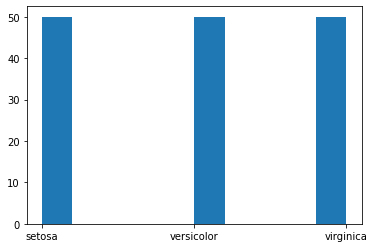

In [3]:
plt.hist(data.Species)

In [4]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [10]:
data["train"] = np.random.uniform(0,1, len(data))<=0.75

<ipython-input-13-6a1dca249e46>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.hist(data["train"].astype(np.int))


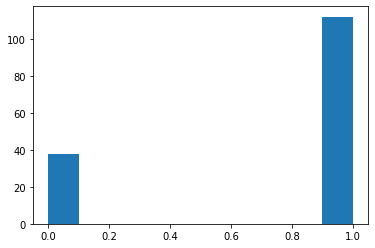

In [13]:
plt.hist(data["train"].astype(np.int))
plt.show()

In [14]:
train, test = data[data["train"]==True], data[data["train"]==False]

In [16]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [17]:
preds = tree.predict(test[predictors])

In [18]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,12,0,0
versicolor,0,16,2
virginica,0,0,8


## Cross Validation para la poda

In [21]:
X = data[predictors]
Y = data[target]

In [22]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [26]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
cv.get_n_splits(X)

10

In [27]:
scores = cross_val_score(tree, X, Y, scoring=make_scorer(accuracy_score), cv = cv, n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [28]:
score = np.mean(scores)
score

0.9333333333333333

In [31]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    cv.get_n_splits(X)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=-1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",tree.feature_importances_)

Score para i =  1  es de  0.5666666666666667
    [0. 0. 1. 0.]
Score para i =  2  es de  0.9200000000000002
    [0.         0.         0.66620285 0.33379715]
Score para i =  3  es de  0.9400000000000001
    [0.         0.         0.68976981 0.31023019]
Score para i =  4  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  5  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  6  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  7  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  8  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  9  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  10  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
